In [12]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Entrenamiento del Modelo de Clasificación\n",
    "\n",
    "Este notebook entrena el modelo CNN usando los datos procesados."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "import sys\n",
    "sys.path.append('..')\n",
    "\n",
    "from src.models.classifier import DocumentClassifier\n",
    "from src.features.extractor import FeatureExtractor\n",
    "import numpy as np\n",
    "from sklearn.model_selection import train_test_split\n",
    "import json\n",
    "import matplotlib.pyplot as plt\n",
    "import cv2\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Cargar datos procesados y etiquetas\n",
    "with open('../data/labels.json', 'r') as f:\n",
    "    labels = json.load(f)\n",
    "\n",
    "# Preparar datos para entrenamiento\n",
    "X = []\n",
    "y = []\n",
    "\n",
    "for pdf_name, pages in labels.items():\n",
    "    for page in range(pages['total_pages']):\n",
    "        img_path = f\"../data/processed/{pdf_name}/page_{page}.png\"\n",
    "        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)\n",
    "        img = cv2.resize(img, (224, 224))\n",
    "        img = img / 255.0\n",
    "        X.append(img[..., np.newaxis])\n",
    "        y.append(1 if page in pages['target_pages'] else 0)\n",
    "\n",
    "X = np.array(X)\n",
    "y = np.array(y)\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Dividir datos en entrenamiento y validación\n",
    "X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)\n",
    "\n",
    "# Crear y entrenar modelo\n",
    "classifier = DocumentClassifier()\n",
    "classifier.compile_model()\n",
    "\n",
    "history = classifier.train(\n",
    "    X_train, y_train,\n",
    "    validation_data=(X_val, y_val),\n",
    "    epochs=20\n",
    ")\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Visualizar resultados\n",
    "plt.figure(figsize=(12, 4))\n",
    "\n",
    "plt.subplot(1, 2, 1)\n",
    "plt.plot(history.history['loss'], label='Training Loss')\n",
    "plt.plot(history.history['val_loss'], label='Validation Loss')\n",
    "plt.title('Model Loss')\n",
    "plt.xlabel('Epoch')\n",
    "plt.ylabel('Loss')\n",
    "plt.legend()\n",
    "\n",
    "plt.subplot(1, 2, 2)\n",
    "plt.plot(history.history['accuracy'], label='Training Accuracy')\n",
    "plt.plot(history.history['val_accuracy'], label='Validation Accuracy')\n",
    "plt.title('Model Accuracy')\n",
    "plt.xlabel('Epoch')\n",
    "plt.ylabel('Accuracy')\n",
    "plt.legend()\n",
    "\n",
    "plt.tight_layout()\n",
    "plt.show()\n"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": ".venv",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.10.11"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}

{'cells': [{'cell_type': 'markdown',
   'metadata': {},
   'source': ['# Entrenamiento del Modelo de Clasificación\n',
    '\n',
    'Este notebook entrena el modelo CNN usando los datos procesados.']},
  {'cell_type': 'code',
   'execution_count': None,
   'metadata': {},
   'source': ['import sys\n',
    "sys.path.append('..')\n",
    '\n',
    'from src.models.classifier import DocumentClassifier\n',
    'from src.features.extractor import FeatureExtractor\n',
    'import numpy as np\n',
    'from sklearn.model_selection import train_test_split\n',
    'import json\n',
    'import matplotlib.pyplot as plt\n',
    'import cv2\n']},
  {'cell_type': 'code',
   'execution_count': None,
   'metadata': {},
   'source': ['# Cargar datos procesados y etiquetas\n',
    "with open('../data/labels.json', 'r') as f:\n",
    '    labels = json.load(f)\n',
    '\n',
    '# Preparar datos para entrenamiento\n',
    'X = []\n',
    'y = []\n',
    '\n',
    'for pdf_name, pages in labels.items():\n

In [14]:
!pip install jupyter notebook

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3333 - loss: 1.6898 - precision: 0.1176 - recall: 0.6667

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3333 - loss: 1.6898 - precision: 0.1176 - recall: 0.6667 - val_accuracy: 1.0000 - val_loss: 0.0092 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 39.4646 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2537 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9583 - loss: 3.9318 - precision: 1.0000 - recall: 0.6667 - val_accuracy: 0.0000e+00 - val_loss: 1.2731 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 13.6622 - precision: 0.4286 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.7415 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - 

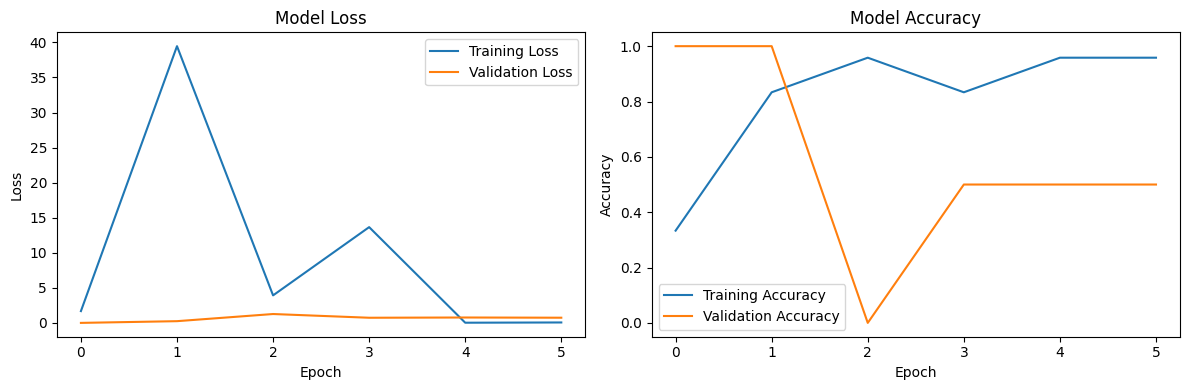

In [13]:
# Entrenamiento del Modelo de Clasificación

# Este script entrena el modelo CNN usando los datos procesados.

import sys
import os
sys.path.append('..')

from src.models.classifier import DocumentClassifier
from src.features.extractor import FeatureExtractor
import numpy as np
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt
import cv2

# Cargar datos procesados y etiquetas
with open('../data/labels.json', 'r') as f:
    labels = json.load(f)

# Preparar datos para entrenamiento
X = []
y = []

for pdf_name, pages in labels.items():
    for page in range(pages['total_pages']):
        img_path = f"../data/processed/{pdf_name}/page_{page}.png"
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (224, 224))
        img = img / 255.0
        X.append(img[..., np.newaxis])
        y.append(1 if page in pages['target_pages'] else 0)

X = np.array(X)
y = np.array(y)

# Dividir datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
classifier = DocumentClassifier()
classifier.compile_model()

history = classifier.train(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20
)

# Visualizar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()